In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset from the 'Data' folder
data = pd.read_csv('Data/SyriaTel_Customer_Churn.csv')


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0   

In [5]:
# Summary statistics
print("\nSummary statistics of numerical variables:")
print(data.describe())



Summary statistics of numerical variables:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.11431

In [6]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())



Missing values:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [7]:
# Check the distribution of the target variable 'Churn'
print("\nDistribution of the target variable 'churn':")
print(data['churn'].value_counts())



Distribution of the target variable 'churn':
churn
False    2850
True      483
Name: count, dtype: int64


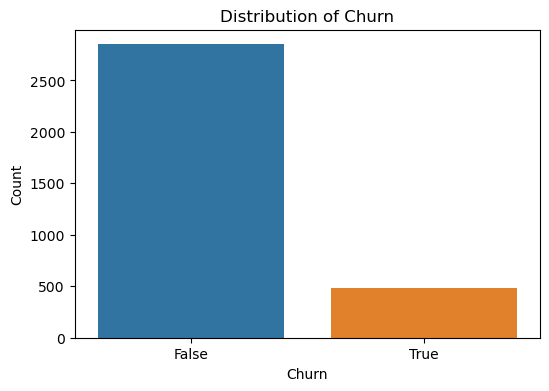

In [8]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


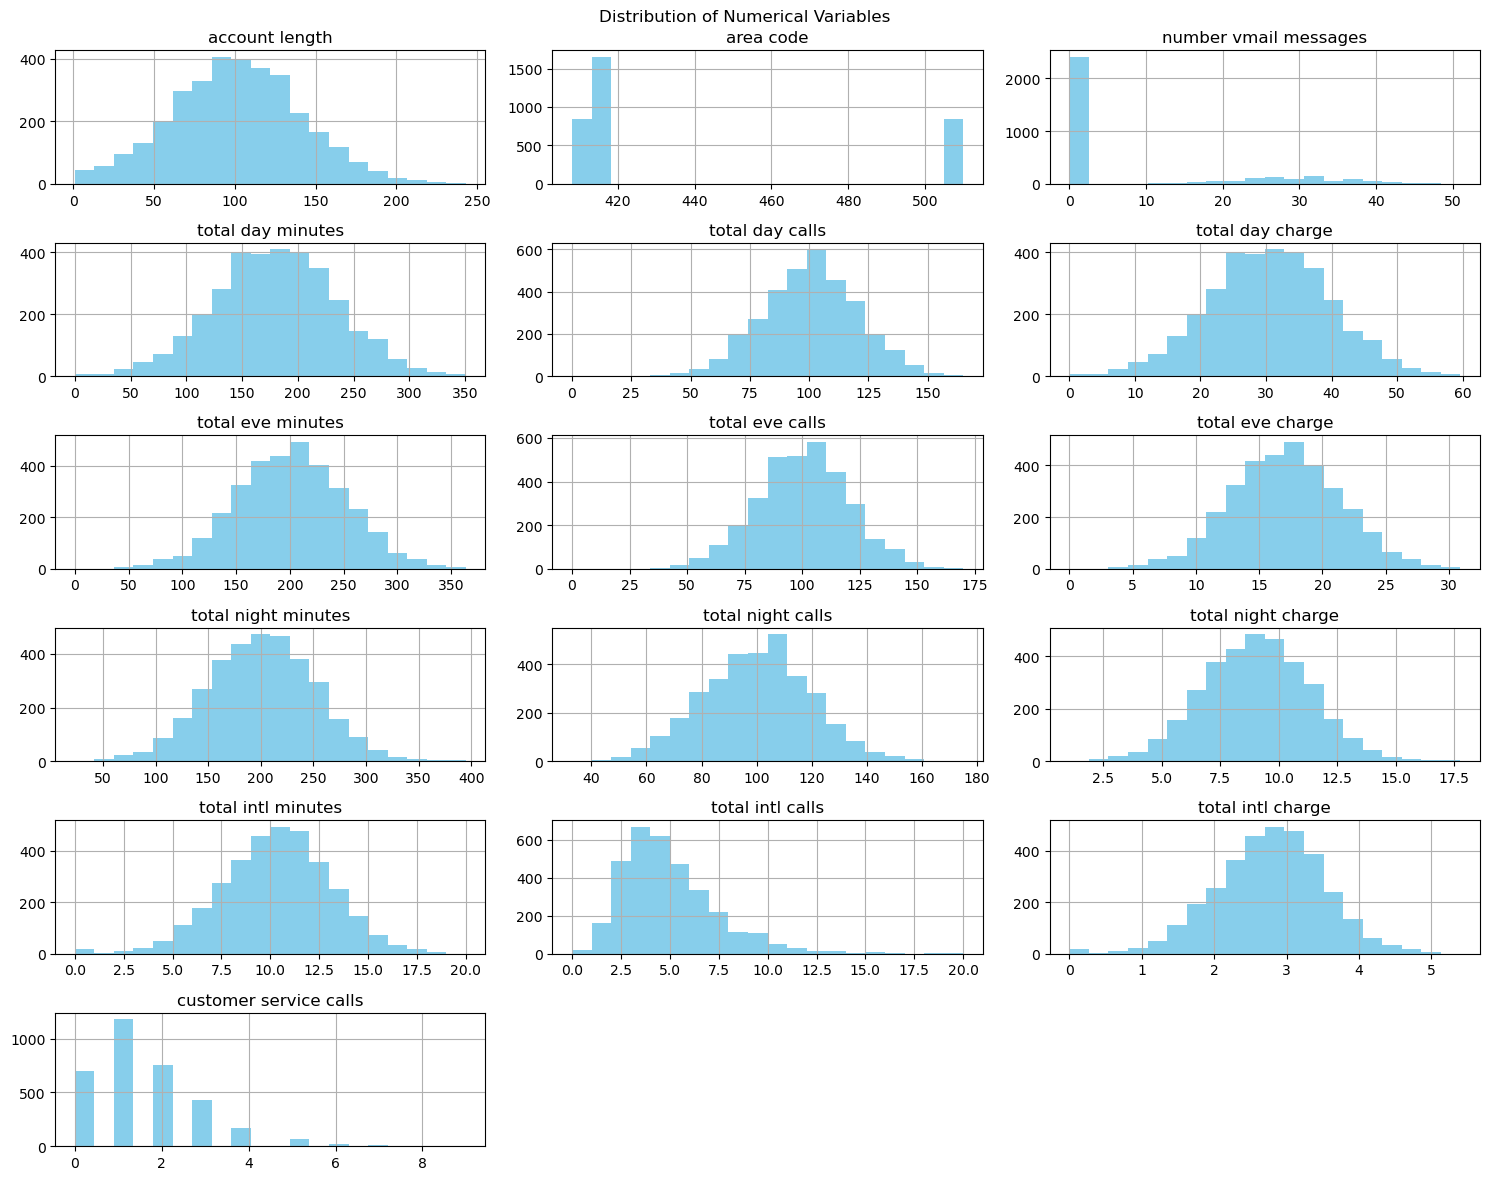

In [9]:
# Explore the distribution of numerical variables
# Select numerical columns
numerical_cols = data.select_dtypes(include='number').columns.tolist()

# Determine the layout based on the number of numerical columns
num_numerical_cols = len(numerical_cols)
nrows = (num_numerical_cols - 1) // 3 + 1
ncols = min(num_numerical_cols, 3)

# Create histograms for numerical variables
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    data[col].hist(ax=ax, bins=20, color='skyblue')
    ax.set_title(col)

# Remove empty subplots
for i in range(num_numerical_cols, nrows * ncols):
    fig.delaxes(axes[i])

plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout()
plt.show()

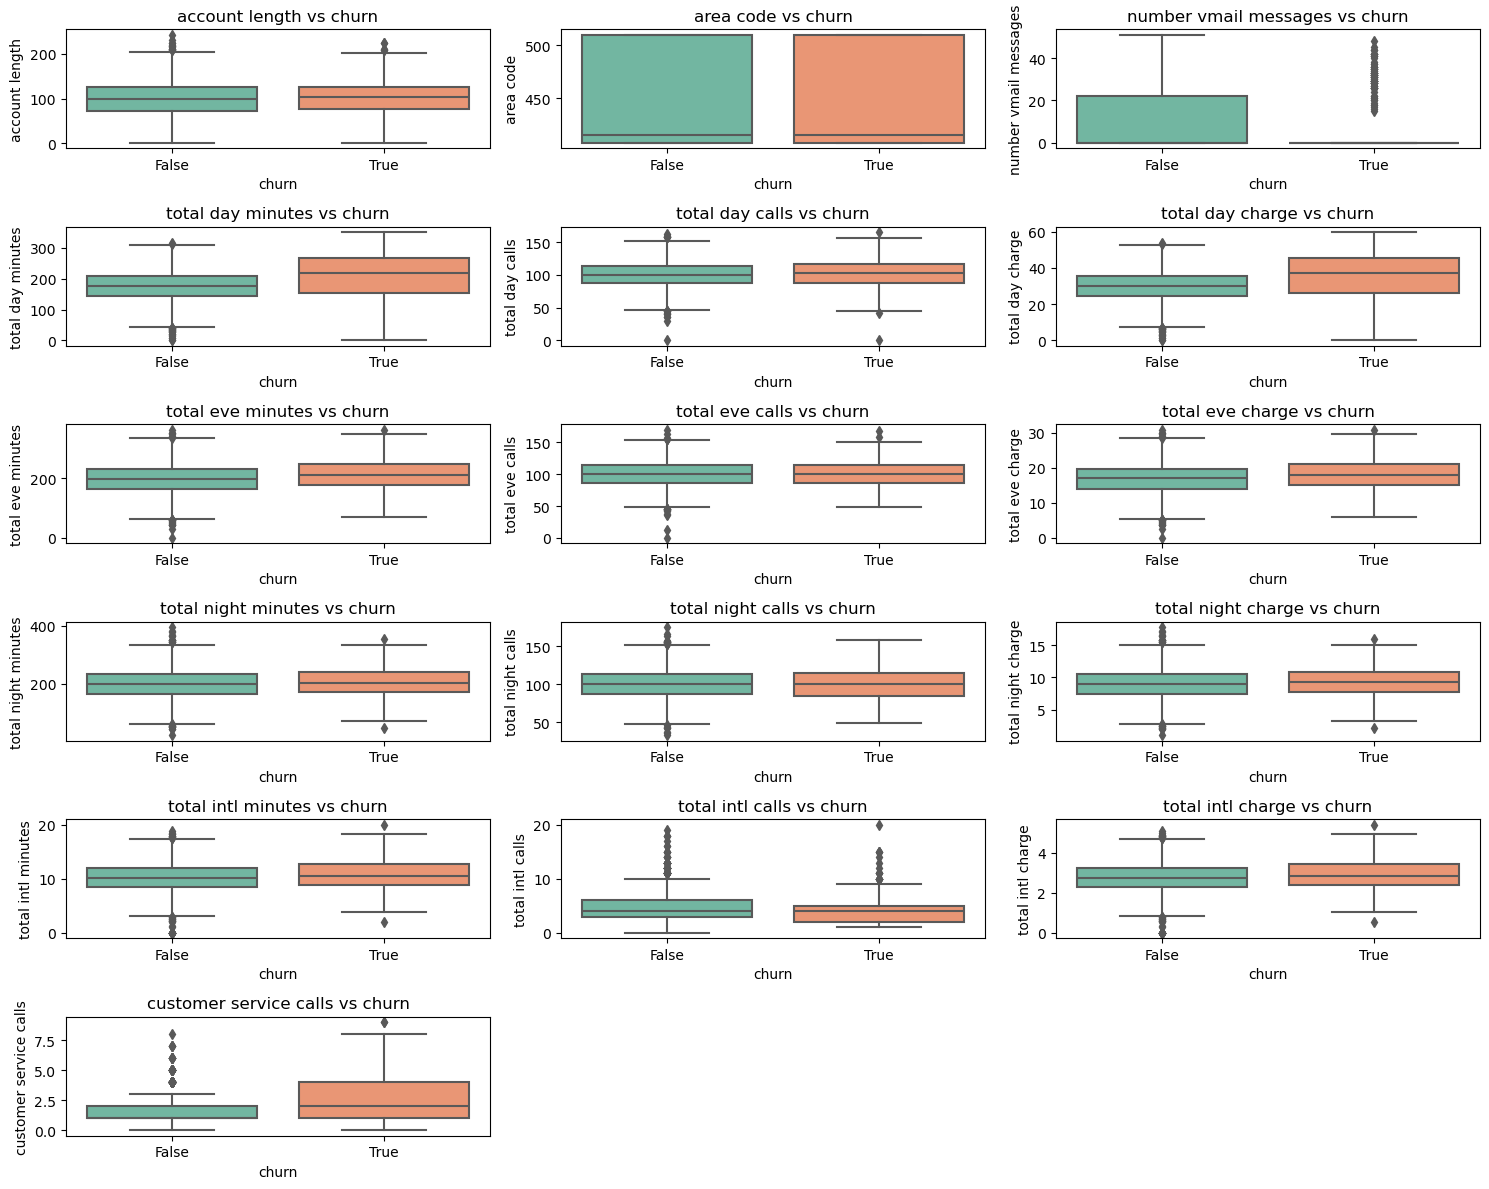

In [14]:
# Explore the relationship between numerical variables and the target variable 'Churn'

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols)
num_rows = (num_cols - 1) // 3 + 1

# Create subplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x='churn', y=col, data=data, palette='Set2')
    plt.title(f'{col} vs churn')

# Adjust layout
plt.tight_layout()
plt.show()

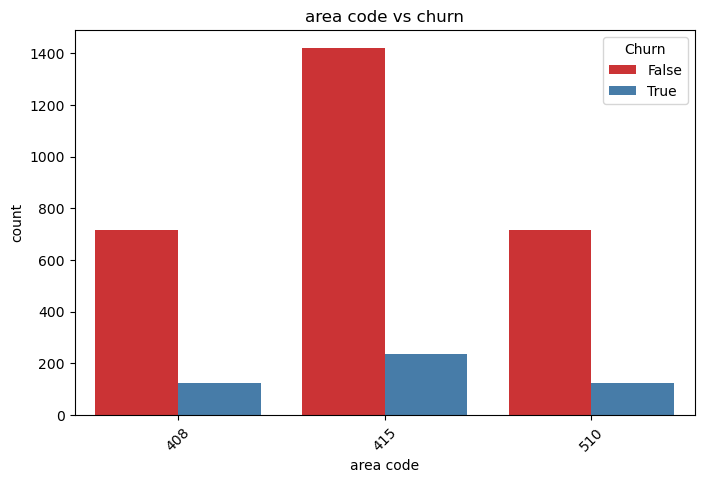

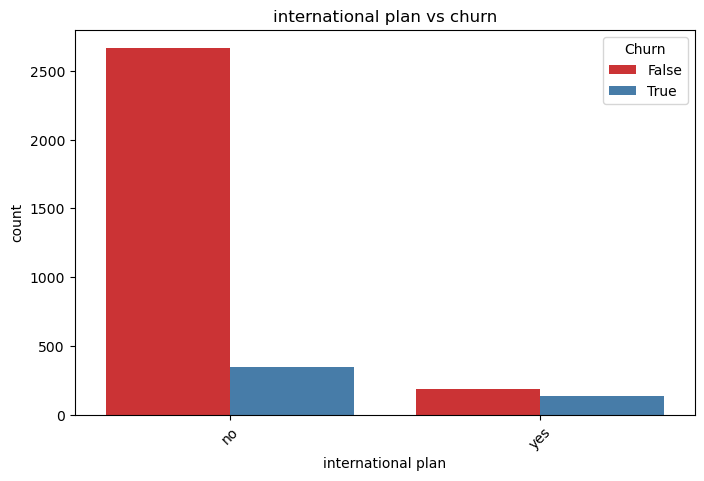

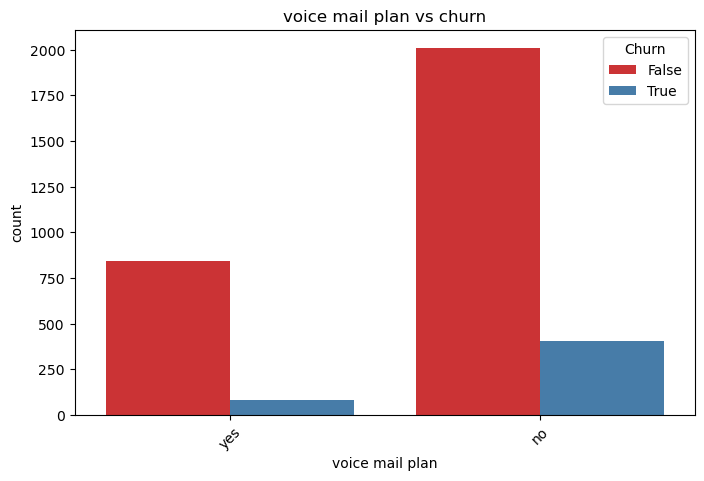

In [21]:
# Explore the relationship between categorical variables and the target variable 'Churn'

# Convert boolean values in 'churn' column to strings
data['churn'] = data['churn'].astype(str)

# Select relevant categorical columns excluding 'churn'
categorical_cols = ['area code', 'international plan', 'voice mail plan']

# Create countplots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='churn', data=data, palette='Set1')
    plt.title(f'{col} vs churn')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()